In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\91912\Downloads\WEBSCRAPING_DF.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Prices                1368 non-null   object 
 1   Brands                1368 non-null   object 
 2   Capacity              1368 non-null   int64  
 3   FreezType             1368 non-null   object 
 4   NoDoors               1368 non-null   object 
 5   StarRating            1309 non-null   float64
 6   compressor            1368 non-null   object 
 7   ProductWarranty       1368 non-null   int64  
 8   CompressorWarrranty   1368 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 96.3+ KB


In [7]:
df["CompressorWarrranty "].unique()

array([10, 20,  9], dtype=int64)

In [9]:
df.columns

Index(['Prices', 'Brands', 'Capacity', 'FreezType', 'NoDoors', 'StarRating',
       'compressor', 'ProductWarranty', 'CompressorWarrranty '],
      dtype='object')

In [11]:
df["Prices"] = df["Prices"].str.replace("₹","").str.replace(",","")

In [13]:
df["Prices"]

0       14990
1       26790
2       16490
3       16490
4       12990
        ...  
1363    17990
1364    14990
1365    24990
1366    13990
1367    20490
Name: Prices, Length: 1368, dtype: object

In [15]:
df["Prices"] = df["Prices"].astype("int64")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Prices                1368 non-null   int64  
 1   Brands                1368 non-null   object 
 2   Capacity              1368 non-null   int64  
 3   FreezType             1368 non-null   object 
 4   NoDoors               1368 non-null   object 
 5   StarRating            1309 non-null   float64
 6   compressor            1368 non-null   object 
 7   ProductWarranty       1368 non-null   int64  
 8   CompressorWarrranty   1368 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 96.3+ KB


In [19]:
df.isna().sum()

Prices                   0
Brands                   0
Capacity                 0
FreezType                0
NoDoors                  0
StarRating              59
compressor               0
ProductWarranty          0
CompressorWarrranty      0
dtype: int64

In [27]:
df.dropna(axis = 0)  

,Prices,Brands,Capacity,FreezType,NoDoors,StarRating,compressor,ProductWarranty,CompressorWarrranty
0,14990,Godrej,180,Direct Cool,Single Door,4.0,on Compressor,1,10
1,26790,Godrej,272,Frost Free,Double Door,2.0,Inverter Compressor,2,10
2,16490,SAMSUNG,183,Direct Cool,Single Door,4.0,Inverter Compressor,1,20
3,16490,SAMSUNG,183,Direct Cool,Single Door,4.0,Inverter Compressor,1,20
4,12990,Whirlpool,184,Direct Cool,Single Door,2.0,Normal Compressor,1,10
...,...,...,...,...,...,...,...,...,...
1363,17990,SAMSUNG,189,Direct Cool,Single Door,5.0,Inverter Compressor,1,20
1364,14990,Godrej,180,Direct Cool,Single Door,4.0,on Compressor,1,10
1365,24990,Godrej,244,Frost Free,Double Door,3.0,Inverter Compressor,2,10
1366,13990,Godrej,183,Direct Cool,Single Door,3.0,Speed Compressor,1,10


In [29]:
df.isna().sum()

Prices                   0
Brands                   0
Capacity                 0
FreezType                0
NoDoors                  0
StarRating              59
compressor               0
ProductWarranty          0
CompressorWarrranty      0
dtype: int64

In [25]:
df["ProductWarranty"].unique()

array([1, 2], dtype=int64)

In [27]:
df["ProductWarranty"] = df["ProductWarranty"].map({1:"One Year",2:"Two Years"})

In [29]:
df["ProductWarranty"].unique()

array(['One Year', 'Two Years'], dtype=object)

In [31]:
df["CompressorWarrranty "].unique()  

array([10, 20,  9], dtype=int64)

In [33]:
df["CompressorWarrranty "] = df["CompressorWarrranty "].map({10:"Ten Years",20:"Twenty Years",9:"Nine Years"})

In [35]:
df["CompressorWarrranty "].unique()

array(['Ten Years', 'Twenty Years', 'Nine Years'], dtype=object)

## Univariante Plots

Text(0.5, 1.0, 'Outlier detection of Prices Variable')

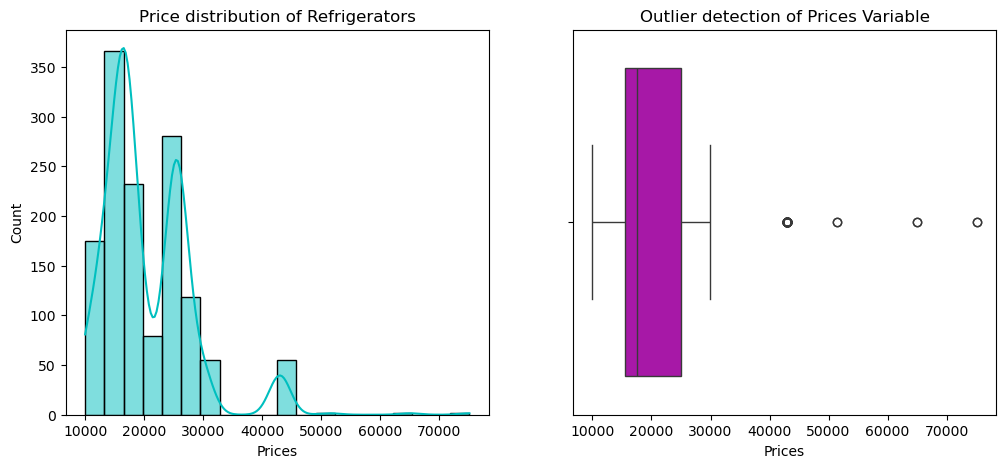

In [37]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.histplot(data = df,x = "Prices",bins = 20,kde = True,color = "c")
plt.xlabel("Prices")
plt.ylabel("Count")
plt.title("Price distribution of Refrigerators")

plt.subplot(1,2,2)
sns.boxplot(x = df["Prices"],color = "m")
plt.title("Outlier detection of Prices Variable")

In [39]:
dff = df["Brands"].value_counts()
dff

Brands
Godrej        627
SAMSUNG       403
Whirlpool     236
CANDY          59
LG             35
Electrolux      6
Haier           2
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Refrigerators by each brand')

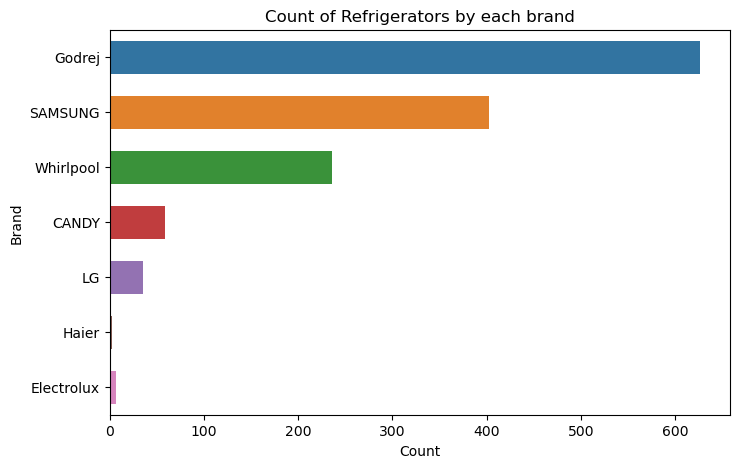

In [41]:
plt.figure(figsize = (8,5))
sns.countplot(data = df,y = "Brands",width = 0.6,hue = "Brands")
plt.xlabel("Count")
plt.ylabel("Brand")
plt.title("Count of Refrigerators by each brand")

Text(0.5, 1.0, 'Outlier detection of Capacity Variable')

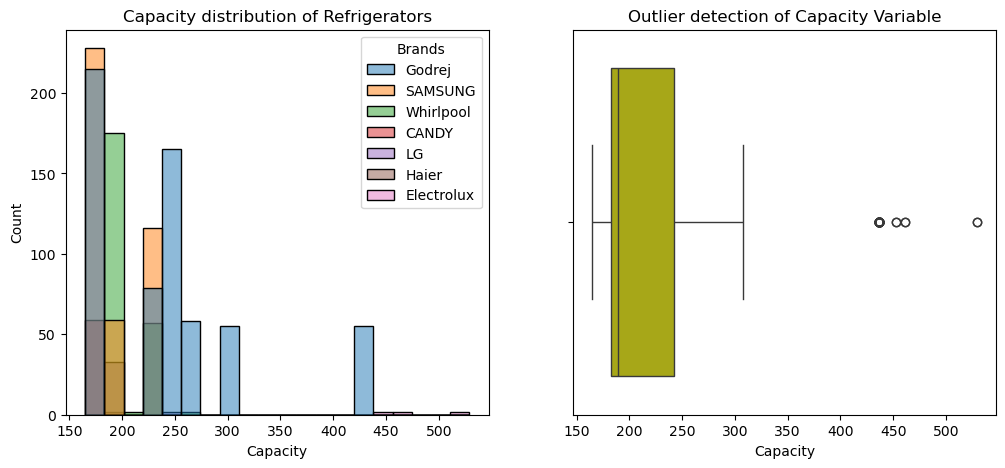

In [33]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.histplot(data = df,x = "Capacity", hue = "Brands",bins = 20,color = "b")
plt.xlabel("Capacity")
plt.ylabel("Count")
plt.title("Capacity distribution of Refrigerators")

plt.subplot(1,2,2)
sns.boxplot(x = df["Capacity"],color = "y")
plt.title("Outlier detection of Capacity Variable")

In [47]:
dff1 = df["StarRating"].value_counts()
dff1

StarRating
2.0    367
3.0    346
5.0    339
4.0    253
1.0     63
Name: count, dtype: int64

Text(0.5, 1.0, 'Percentage Distribution of Star Ratings Variable')

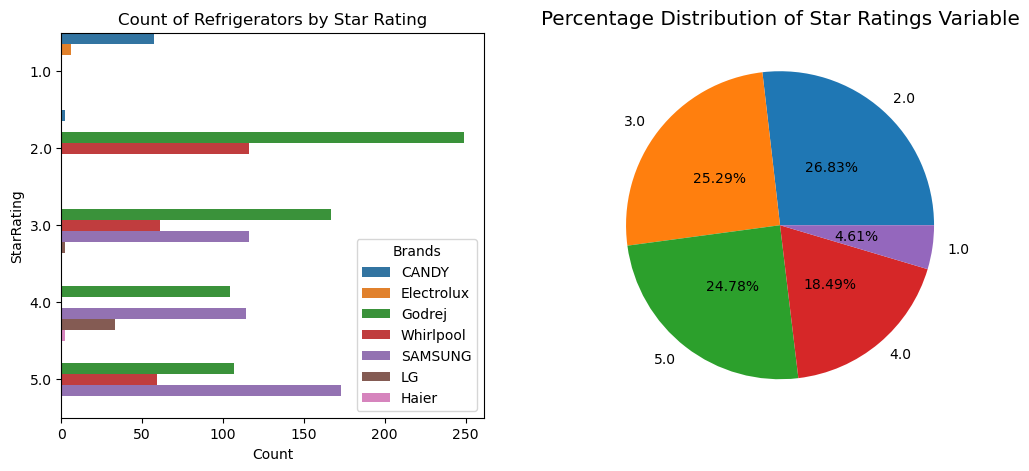

In [49]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.countplot(data = df,y = "StarRating",width = 1,hue = "Brands")
plt.xlabel("Count")
plt.ylabel("StarRating")
plt.title("Count of Refrigerators by Star Rating")

plt.subplot(1,2,2)
plt.pie(dff1,labels = dff1.index,autopct = "%1.2f%%",colors =plt.style.use("ggplot"),pctdistance = 0.5)
plt.title("Percentage Distribution of Star Ratings Variable")

In [51]:
dff2 = df["compressor"].value_counts()
dff2

compressor
Inverter Compressor         740
on Compressor               222
Normal Compressor           175
Reciprocating Compressor    118
Speed Compressor            111
Reciprocatory Compressor      2
Name: count, dtype: int64

Text(0.5, 1.0, 'Percentage Distribution of Compressor Type Variable')

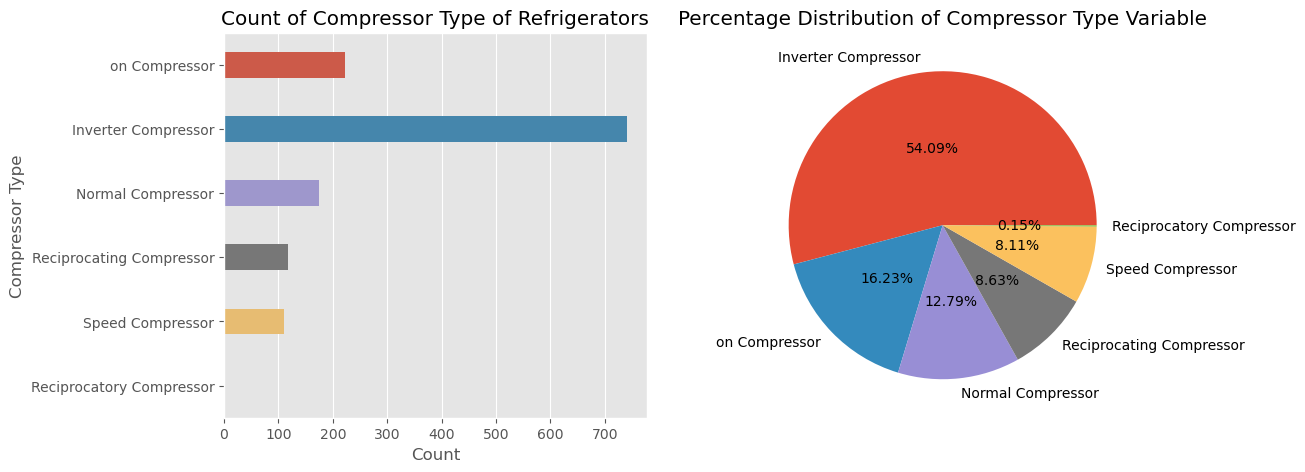

In [53]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.countplot(data = df,y = "compressor",width = 0.4,hue = "compressor")
plt.xlabel("Count")
plt.ylabel("Compressor Type")
plt.title("Count of Compressor Type of Refrigerators")

plt.subplot(1,2,2)
plt.pie(dff2,labels = dff2.index,autopct = "%1.2f%%",colors =plt.style.use("ggplot"),pctdistance = 0.5)
plt.title("Percentage Distribution of Compressor Type Variable")

In [55]:
dff3 = df["CompressorWarrranty "].value_counts()
dff3

CompressorWarrranty 
Ten Years       839
Twenty Years    403
Nine Years      126
Name: count, dtype: int64

Text(0.5, 1.0, 'Percentage Distribution of CompressorWaranty Variable')

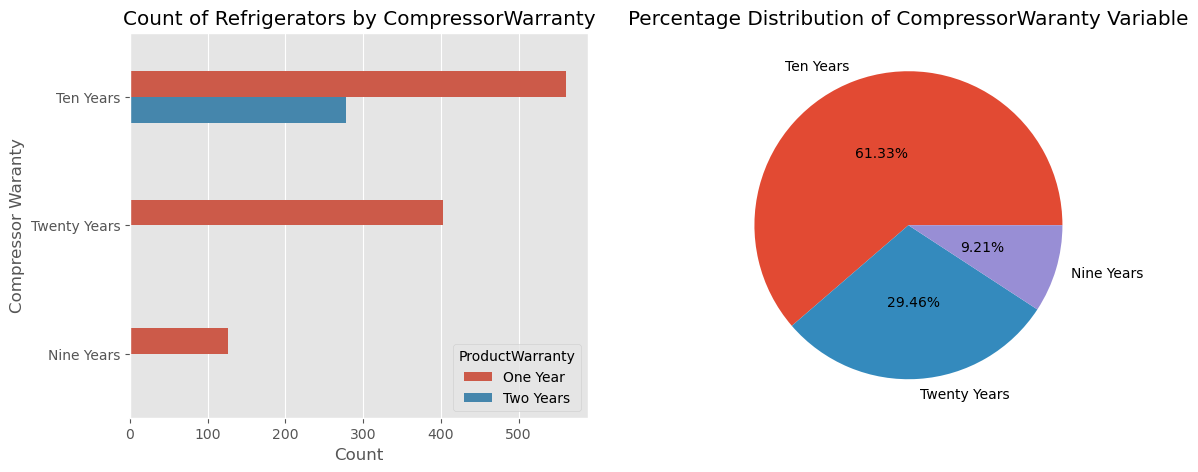

In [57]:
plt.figure(figsize = (13,5))

plt.subplot(1,2,1)
sns.countplot(data = df,y = "CompressorWarrranty ",width = 0.4,hue = "ProductWarranty")
plt.xlabel("Count")
plt.ylabel("Compressor Waranty")
plt.title("Count of Refrigerators by CompressorWarranty")

plt.subplot(1,2,2)
plt.pie(dff3,labels = dff3.index,autopct = "%1.2f%%",colors =plt.style.use("ggplot"),pctdistance = 0.5)
plt.title("Percentage Distribution of CompressorWaranty Variable")

In [61]:
df.columns

Index(['Prices', 'Brands', 'Capacity', 'FreezType', 'NoDoors', 'StarRating',
       'compressor', 'ProductWarranty', 'CompressorWarrranty '],
      dtype='object')

## BiVariante Plots

Text(0.5, 1.0, 'Price Vs Capacity')

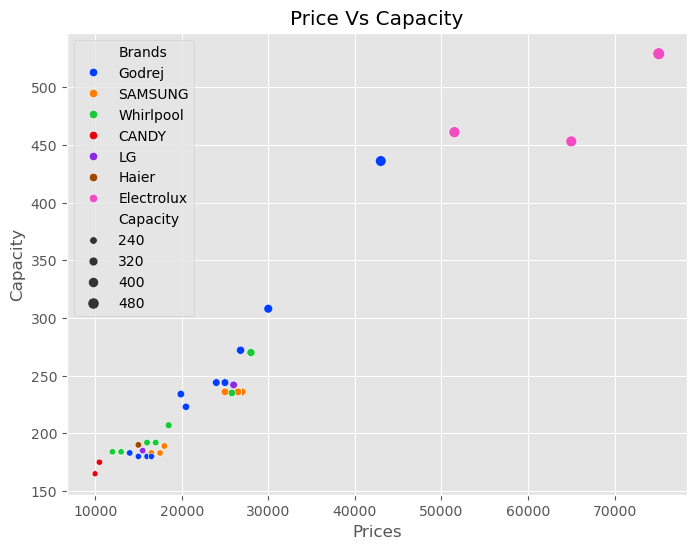

In [104]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df,x = "Prices",y = "Capacity",hue = "Brands",palette ="bright",size = "Capacity")
plt.title("Price Vs Capacity")

Text(0.5, 1.0, 'Price Vs StarRating')

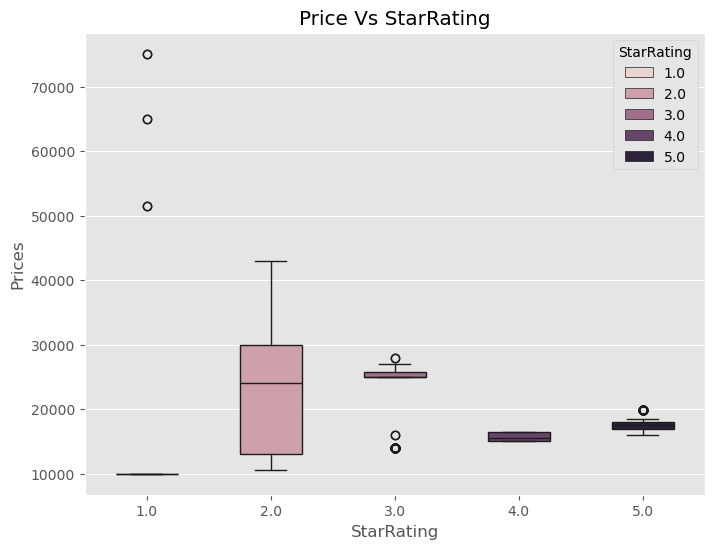

In [116]:
plt.figure(figsize = (8,6))
sns.boxplot(data = df,x = "StarRating",y = "Prices",width = 0.5,hue ="StarRating")
plt.title("Price Vs StarRating")

Text(0.5, 1.0, 'StarRating Vs Brands')

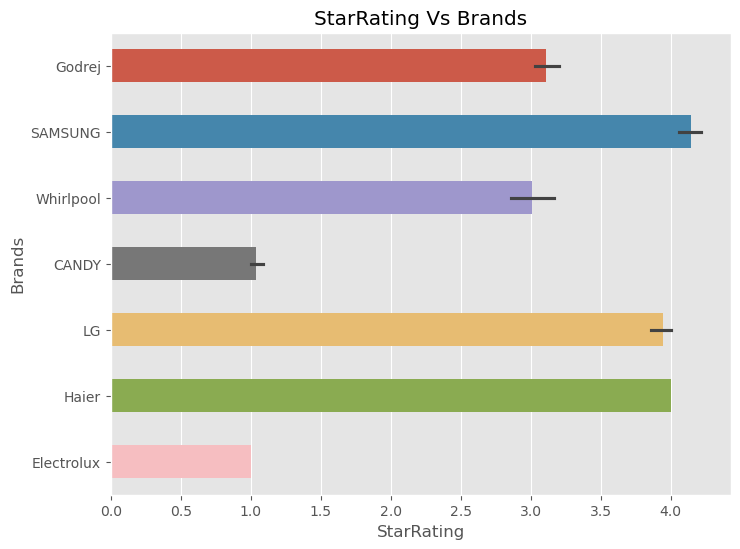

In [130]:
plt.figure(figsize = (8,6))
sns.barplot(data = df,x= "StarRating",y = "Brands",width = 0.5,hue = "Brands")
plt.title("StarRating Vs Brands")

Text(0.5, 1.0, 'Price Vs Number Of Doors')

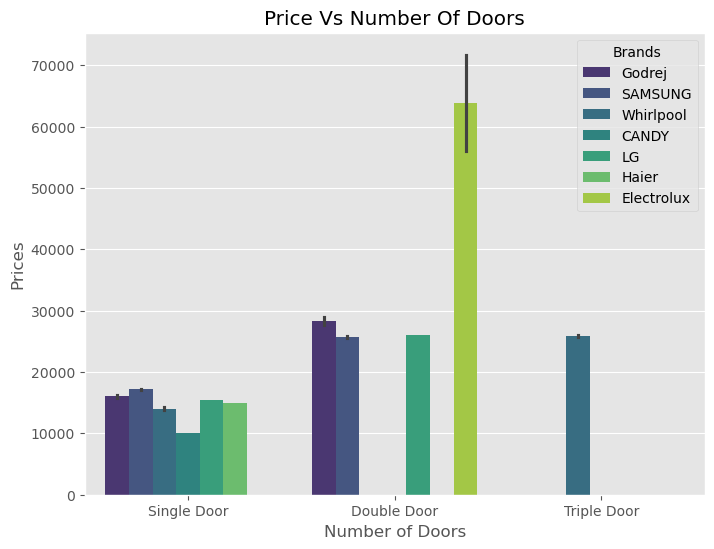

In [152]:
plt.figure(figsize = (8,6))
sns.barplot(data = df,y = "Prices",x = "NoDoors",hue = "Brands",palette ="viridis",width = 0.8)
plt.xlabel("Number of Doors")
plt.title("Price Vs Number Of Doors")

Text(0.5, 1.0, 'Price Vs Freez Type')

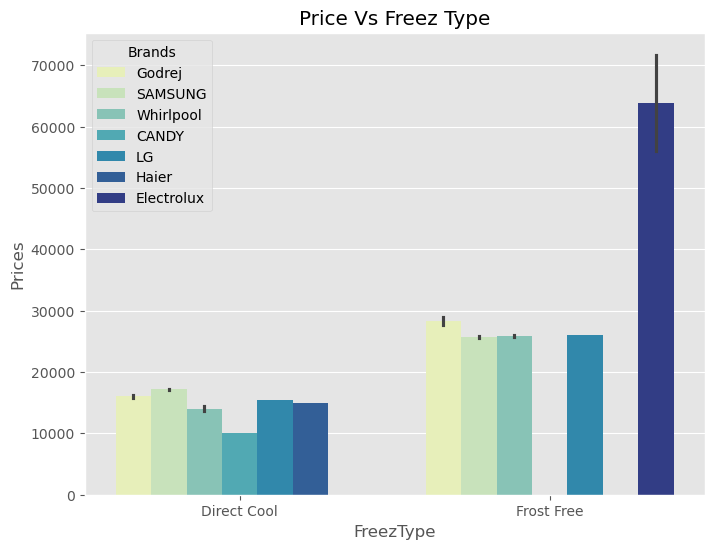

In [160]:
plt.figure(figsize = (8,6))
sns.barplot(data = df,y = "Prices",x = "FreezType",hue = "Brands",palette ="YlGnBu",width = 0.8)
plt.title("Price Vs Freez Type")

Text(0.5, 1.0, 'Price Vs Freez Type Vs Star Rating')

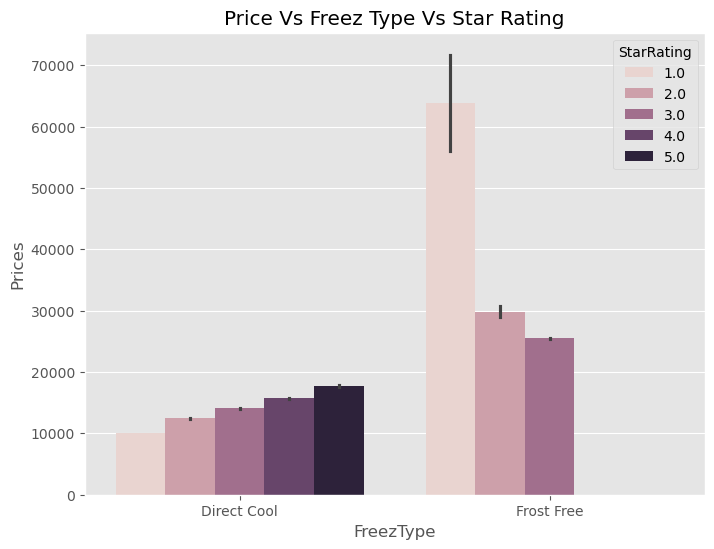

In [183]:
plt.figure(figsize = (8,6))
sns.barplot(data = df,y = "Prices",hue = "StarRating",x = "FreezType",width = 0.8)
plt.title("Price Vs Freez Type Vs Star Rating")

Text(0.5, 1.0, 'Price Vs Product Warranty')

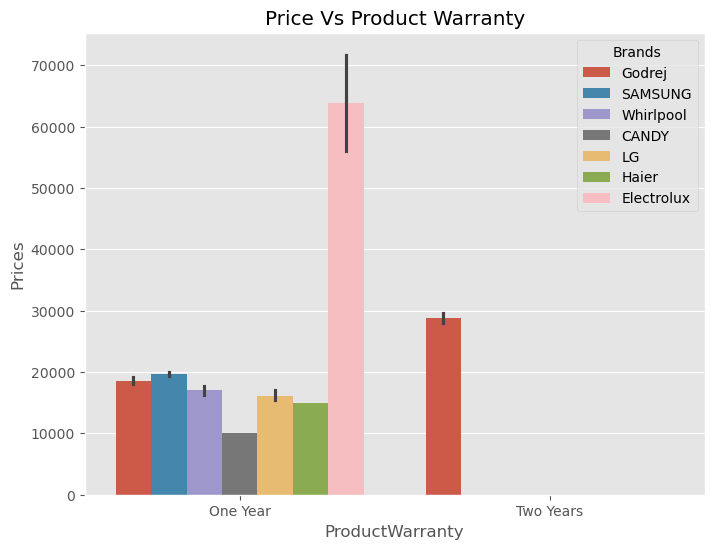

In [185]:
plt.figure(figsize = (8,6))
sns.barplot(data = df,y = "Prices",x = "ProductWarranty",hue = "Brands",width = 0.8)
plt.title("Price Vs Product Warranty")

Text(0.5, 1.0, 'Price Vs Compressor Warranty')

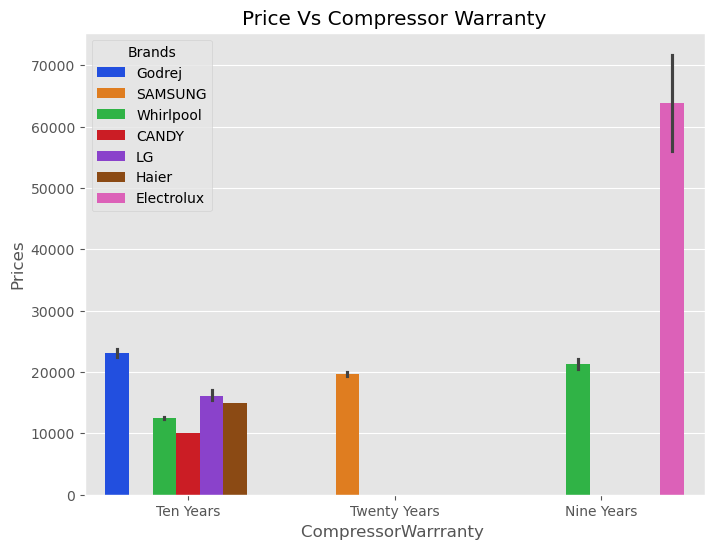

In [199]:
plt.figure(figsize = (8,6))
sns.barplot(data = df,y = "Prices",x = "CompressorWarrranty ",hue = "Brands",palette = "bright",width = 0.8)
plt.title("Price Vs Compressor Warranty")

Text(0.5, 1.0, 'Price Vs Number of Doors Vs Star Rating')

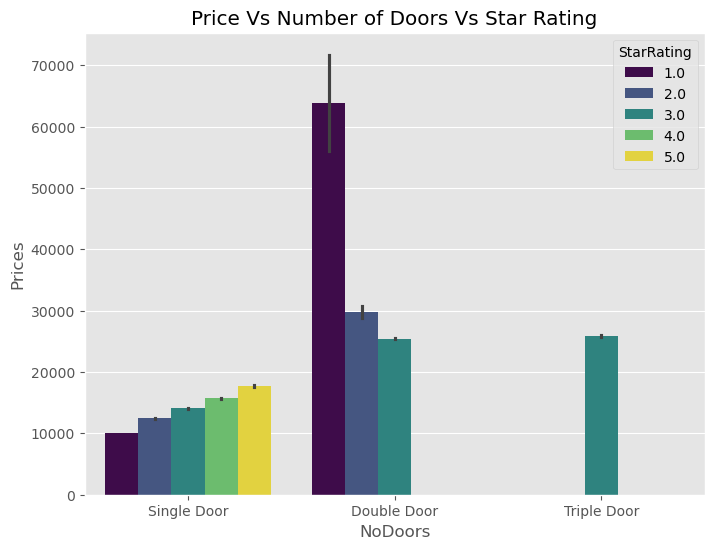

In [197]:
plt.figure(figsize = (8,6))
sns.barplot(data = df,y = "Prices",hue = "StarRating",x = "NoDoors",palette = "viridis",width = 0.8)
plt.title("Price Vs Number of Doors Vs Star Rating")

<Axes: xlabel='StarRating', ylabel='Brands'>

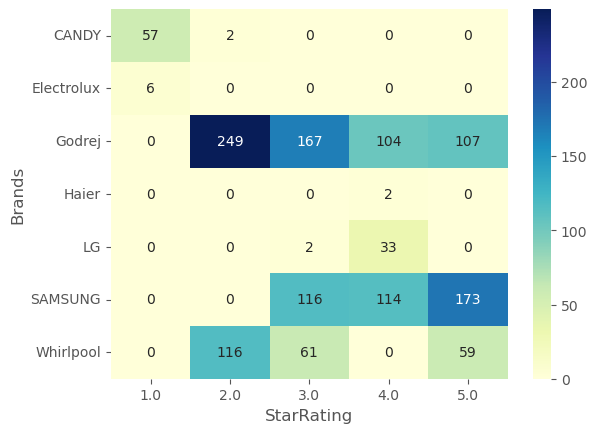

In [201]:
cross_tab = pd.crosstab(df['Brands'],df['StarRating'])
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")

<Axes: xlabel='ProductWarranty', ylabel='CompressorWarrranty '>

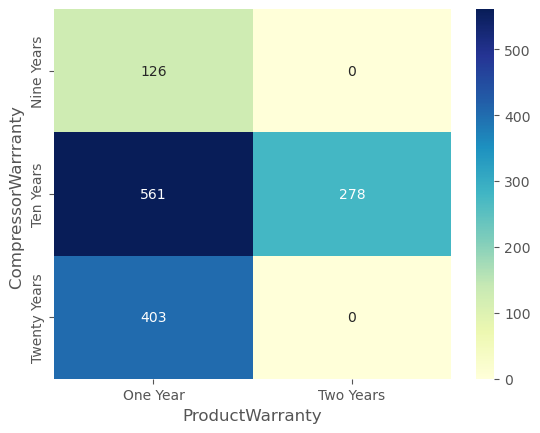

In [209]:
cross_tab = pd.crosstab(df["CompressorWarrranty "],df["ProductWarranty"])
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")

<Axes: >

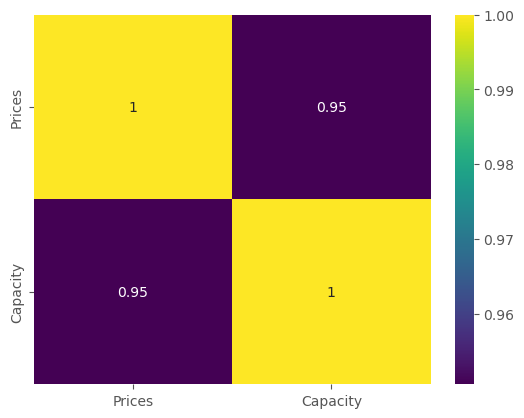

In [211]:
df1 = df.select_dtypes('number') 
df1 = df1.iloc[:,:-1]
cross_tab = df1.corr()
sns.heatmap(cross_tab, annot=True, cmap = "viridis")